# Spam Detector

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Retrieve the Data

The data is located at [https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv](https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv)

Dataset Source: [UCI Machine Learning Library](https://archive.ics.uci.edu/dataset/94/spambase)

Import the data using Pandas. Display the resulting DataFrame to confirm the import was successful.

In [2]:
# Import the data
data = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv")
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

*Replace the text in this markdown cell with your predictions, and be sure to provide justification for your guess.*

## Split the Data into Training and Testing Sets

In [3]:
# Create the labels set `y` and features DataFrame `X`

label_column = 'spam'  
y = data[label_column]              
X = data.drop(columns=[label_column])  

# Display the first few rows of X and y
print(X.head())
print(y.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  word_freq_conference  char_freq_;  \
0             0.00            0.00  ...                   0.0 

Balance of labels:
spam
0    2788
1    1813
Name: count, dtype: int64


NameError: name 'plt' is not defined

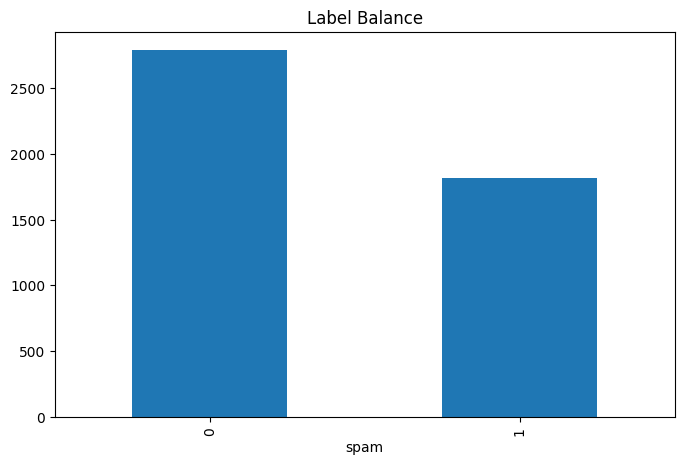

In [5]:
# Check the balance of the labels variable (`y`) by using the `value_counts` function.

label_counts = y.value_counts()
# Print the label counts
print("Balance of labels:")
print(label_counts)

label_counts.plot(kind='bar', title='Label Balance', figsize=(8, 5))
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3680, 57)
X_test shape: (921, 57)
y_train shape: (3680,)
y_test shape: (921,)


## Scale the Features

Use the `StandardScaler` to scale the features data. Remember that only `X_train` and `X_test` DataFrames should be scaled.

In [7]:
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on X_train and transform both X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled data back into DataFrames (optional, for easier inspection)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Display the first few rows of the scaled data
print("Scaled X_train:")
print(X_train_scaled.head())

print("\nScaled X_test:")
print(X_test_scaled.head())

Scaled X_train:
      word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
2940       -0.183216          -0.166310       0.355314      -0.04948   
1303        0.194418           0.031873       1.887235      -0.04948   
3468       -0.340564          -0.166310      -0.551745      -0.04948   
3181       -0.340564          -0.166310      -0.551745      -0.04948   
794        -0.340564           0.260547      -0.551745      -0.04948   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
2940      -0.248384        0.003308         -0.288445           -0.289119   
1303       0.170213        1.742532          0.782699            0.454448   
3468      -0.472632       -0.344536         -0.288445           -0.289119   
3181      -0.472632       -0.344536         -0.288445           -0.289119   
794        0.364562       -0.344536         -0.288445           -0.289119   

      word_freq_order  word_freq_mail  ...  word_freq_conference  char_freq_;  \
2940   

In [7]:
# Fit the Standard Scaler with the training data


In [8]:
# Scale the training data


## Create and Fit a Logistic Regression Model

Create a Logistic Regression model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [8]:
# Train a Logistic Regression model and print the model score
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model on the training data
logistic_model.fit(X_train_scaled, y_train)

# Print the model's score on the training and test data
train_score = logistic_model.score(X_train_scaled, y_train)
test_score = logistic_model.score(X_test_scaled, y_test)

print(f"Training Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")

Training Score: 0.9307
Test Score: 0.9294


In [9]:
# Make and save testing predictions with the saved logistic regression model using the test data

# Review the predictions
# Make predictions on the test data
y_pred = logistic_model.predict(X_test_scaled)

# Save the predictions in a DataFrame
predictions_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
}, index=X_test.index)

# Display the predictions DataFrame
print(predictions_df)

      Actual  Predicted
1472       1          1
258        1          1
3564       0          0
65         1          1
4303       0          0
...      ...        ...
1405       1          1
2312       0          0
2804       0          0
2047       0          0
2597       0          0

[921 rows x 2 columns]


In [10]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

Accuracy Score: 0.9294


## Create and Fit a Random Forest Classifier Model

Create a Random Forest Classifier model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [11]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Print the model's score on the training and test data
train_score = rf_model.score(X_train_scaled, y_train)
test_score = rf_model.score(X_test_scaled, y_test)

print(f"Training Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")

Training Score: 0.9997
Test Score: 0.9446


In [12]:
# Make and save testing predictions with the saved logistic regression model using the test data
# Review the predictions

y_pred = logistic_model.predict(X_test_scaled)

# 
predictions_df = pd.DataFrame({
    "Actual": y_test.values,  # Actual test labels
    "Predicted": y_pred       # Predicted labels
}, index=X_test.index)

print(predictions_df.head())

# 
predictions_df.to_csv("logistic_regression_predictions.csv", index=True)

      Actual  Predicted
1472       1          1
258        1          1
3564       0          0
65         1          1
4303       0          0


In [13]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

Accuracy Score: 0.9294


## Evaluate the Models

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the following markdown cell.

*Replace the text in this markdown cell with your answers to these questions.*